Dataset Link: https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018/data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing datasets (test & train)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/drugsComTrain_raw.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/drugsComTest_raw.csv')

In [ ]:
print("Shape of training dataset:", train.shape)
train.head()

Shape of training dataset: (161297, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
print("Shape of testing dataset:", test.shape)
test.head()

Shape of testing dataset: (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
# From the above two ouputs we can see that both the dataset contains same columns, we can combine them for better analysis

data = pd.concat([train, test])
print("Shape of dataset after combining both train & test:", data.shape)
data.head()

Shape of dataset after combining both train & test: (215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


Data Exploration

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,215063.0,116039.364814,67007.913366,0.0,58115.5,115867.0,173963.5,232291.0
rating,215063.0,6.990008,3.275554,1.0,5.0,8.0,10.0,10.0
usefulCount,215063.0,28.001004,36.346069,0.0,6.0,16.0,36.0,1291.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [ ]:
data.dtypes

,0
uniqueID,int64
drugName,object
condition,object
review,object
rating,int64
date,object
usefulCount,int64


In [ ]:
data.isnull().any()

,0
uniqueID,False
drugName,False
condition,True
review,False
rating,False
date,False
usefulCount,False


In [ ]:
data.isnull().sum()

,0
uniqueID,0
drugName,0
condition,1194
review,0
rating,0
date,0
usefulCount,0


In [ ]:
data = data.dropna(subset=['condition'])

Exploratory Data Analysis

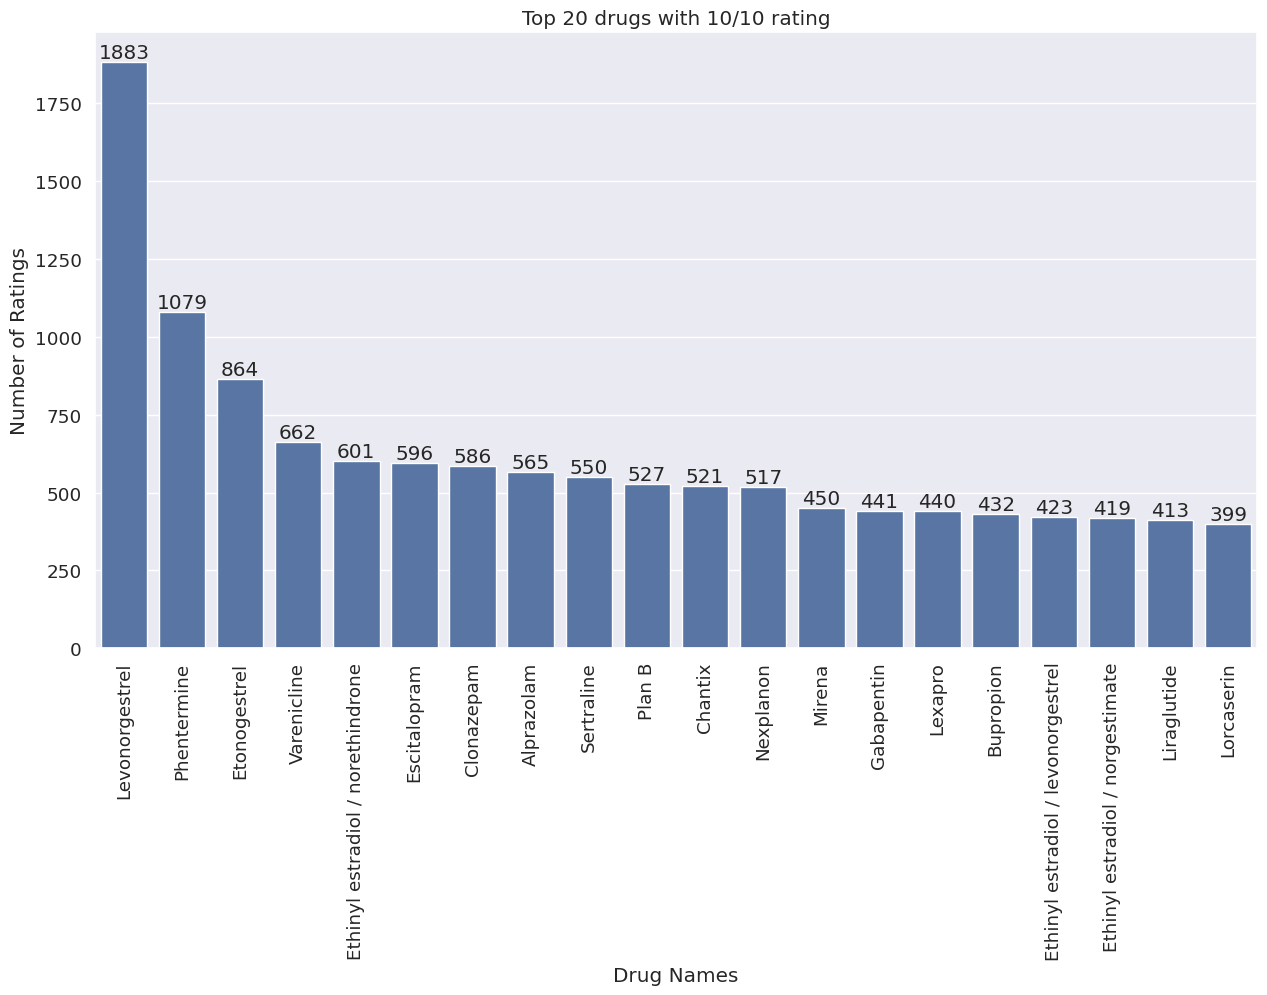

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

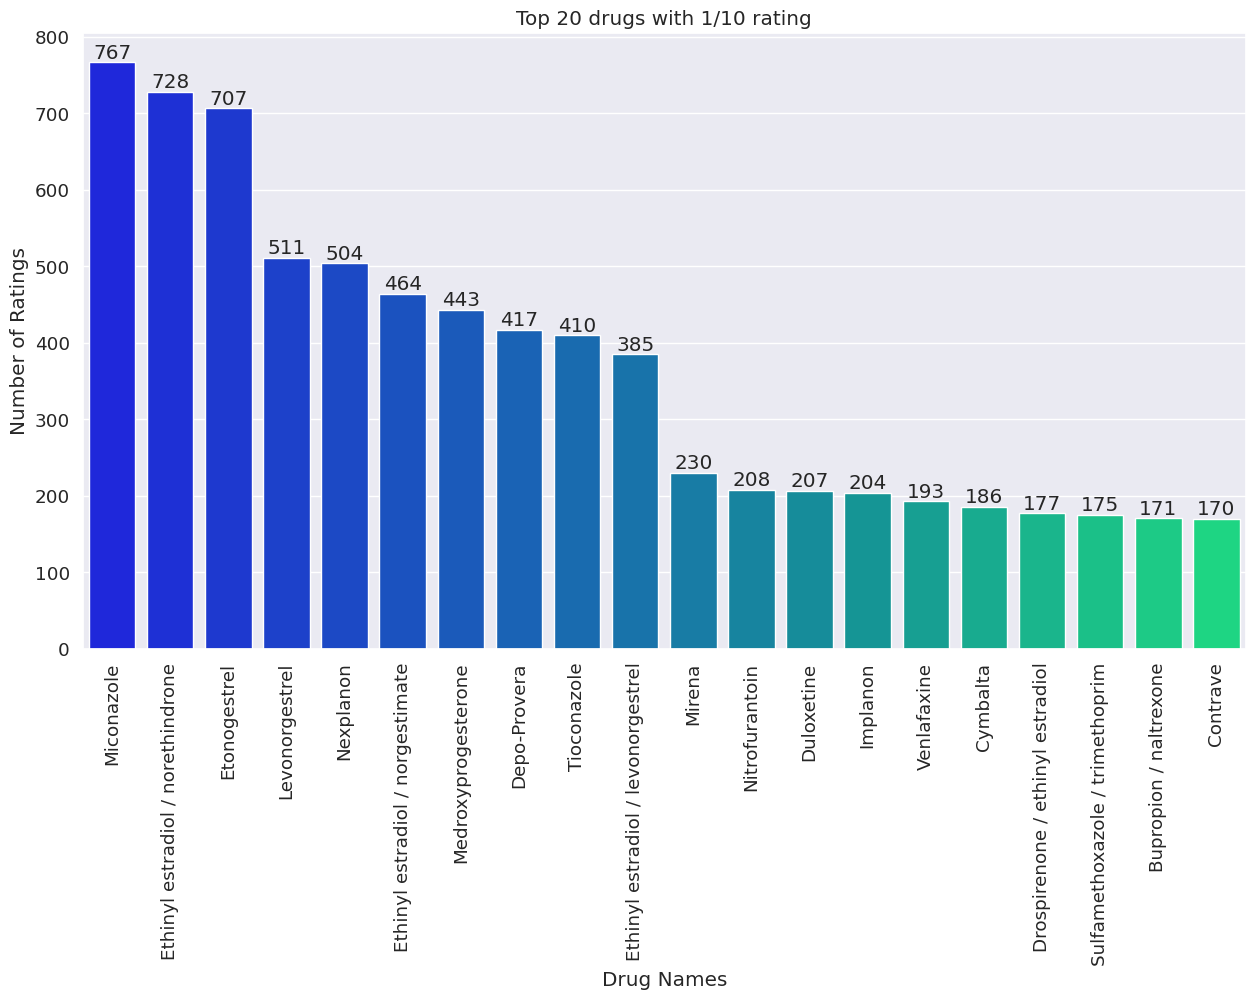

In [ ]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

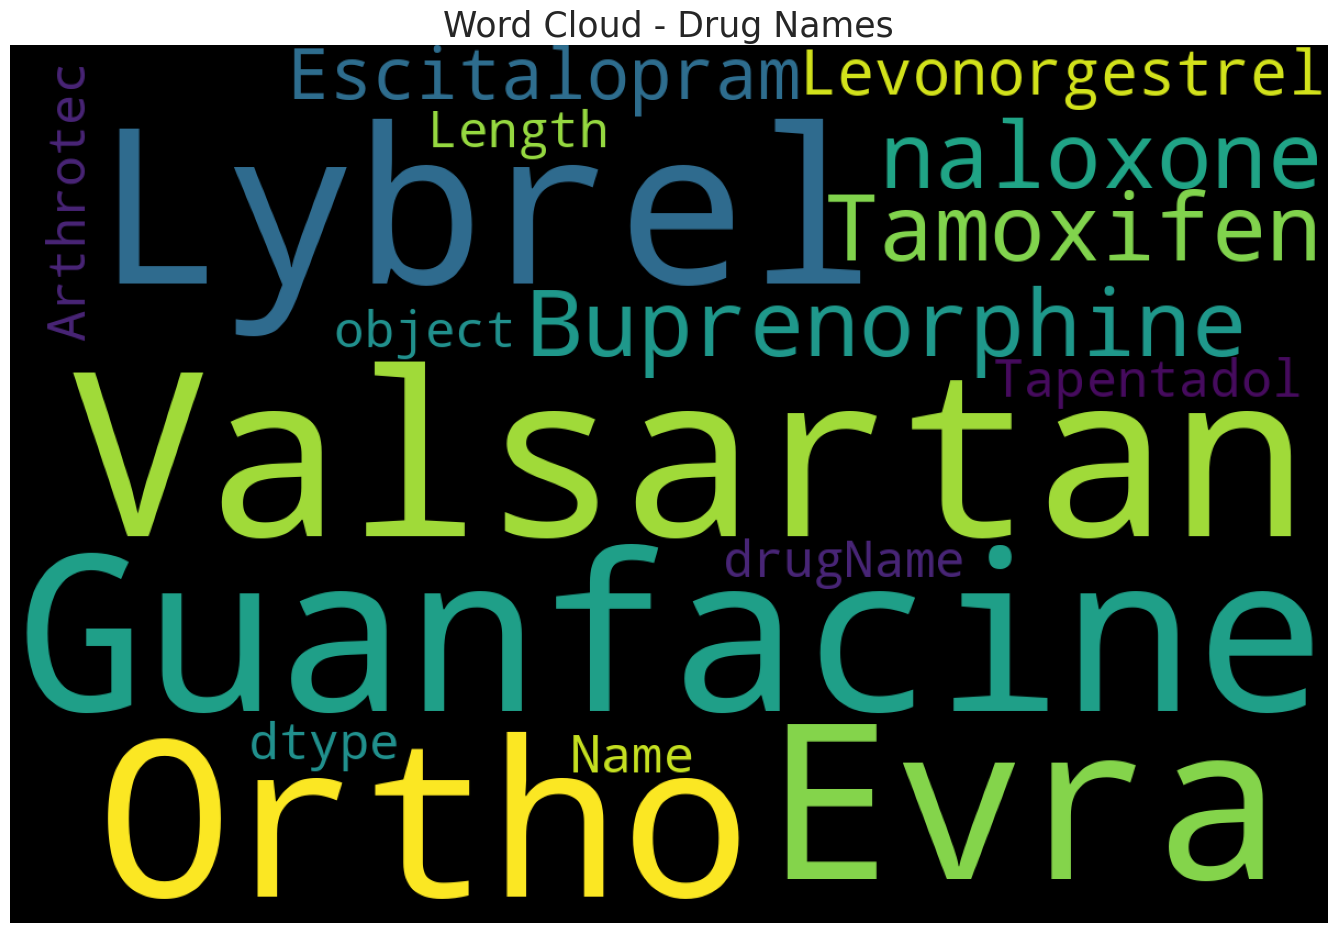

In [ ]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

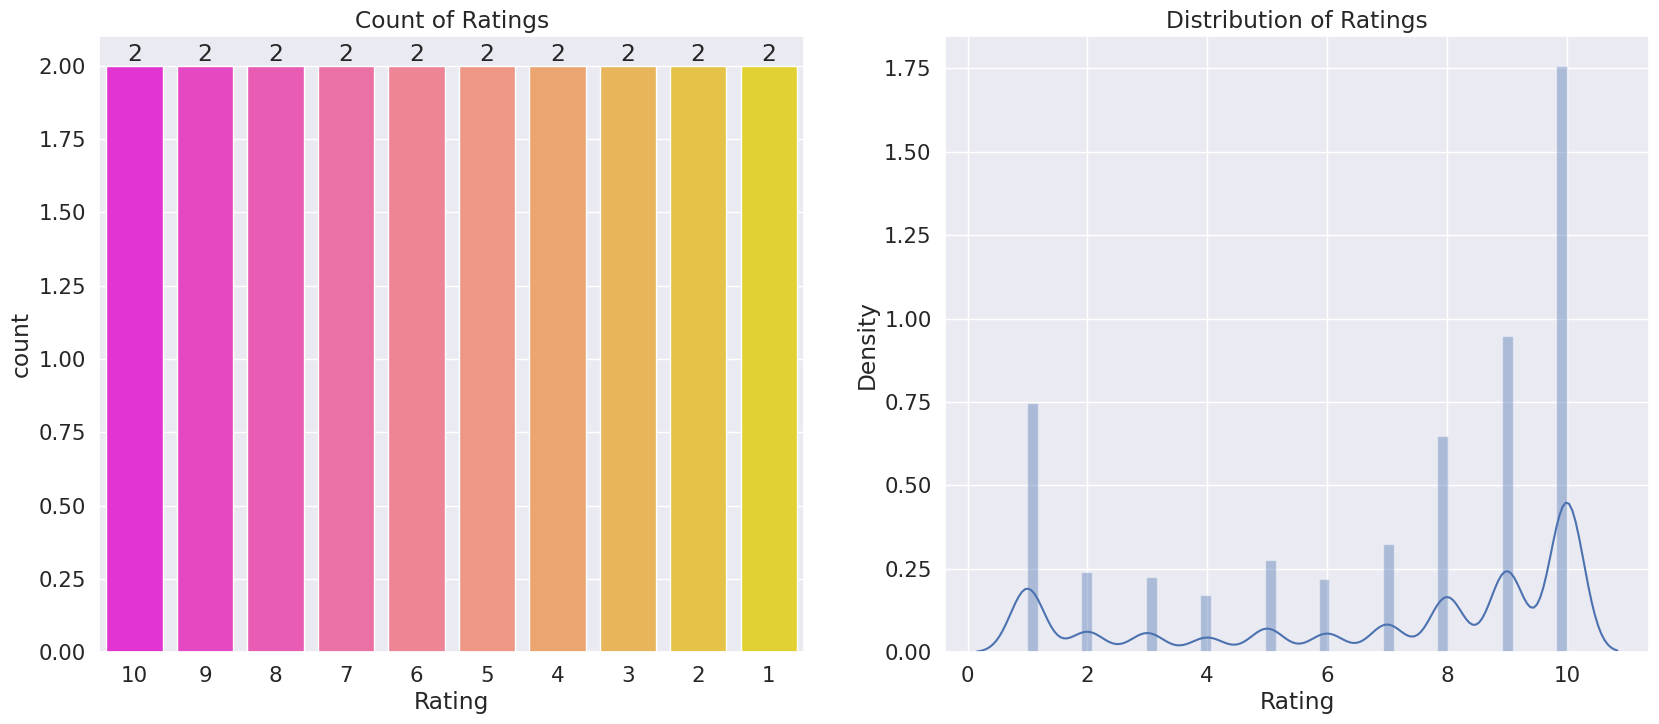

In [ ]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])

for i in sns_1.containers:
    sns_1.bar_label(i,)

sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")
plt.show()

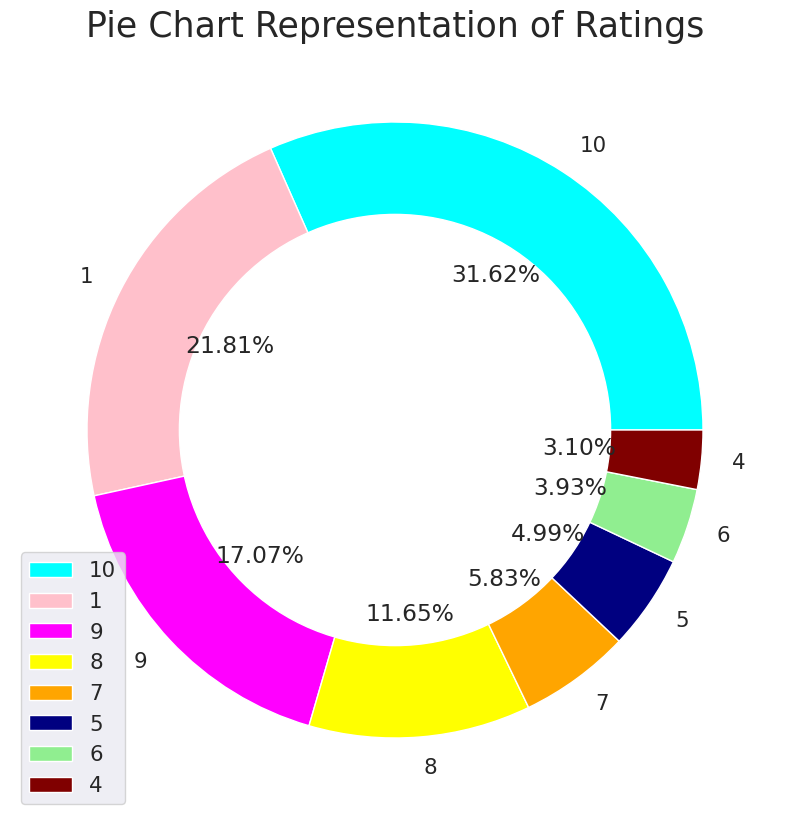

In [ ]:
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['cyan', 'pink', 'magenta',  'yellow', 'orange', 'navy', 'lightgreen', 'maroon']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

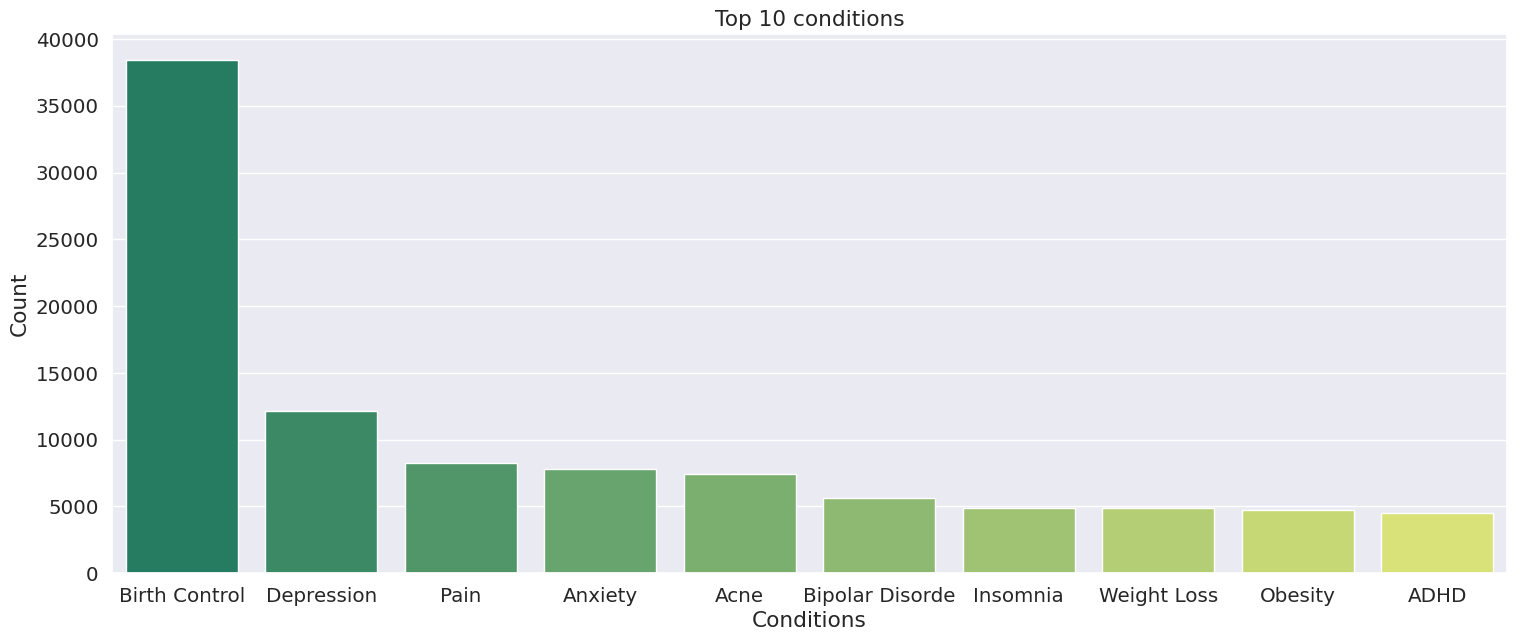

In [ ]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'summer')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")

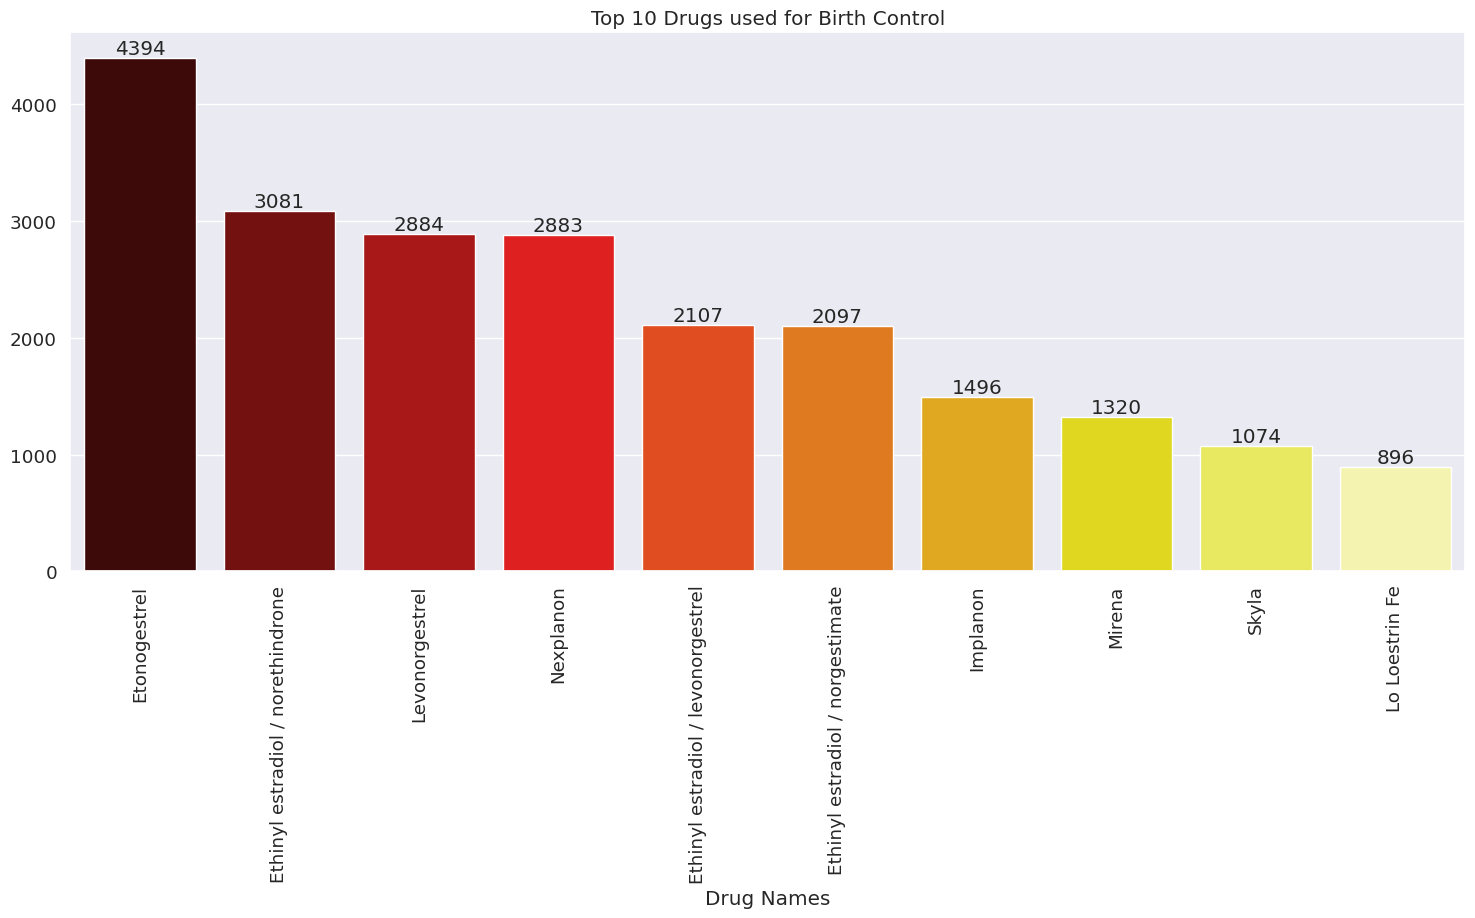

In [ ]:
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'hot')

for i in sns_.containers:
    sns_.bar_label(i,)

sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.show()

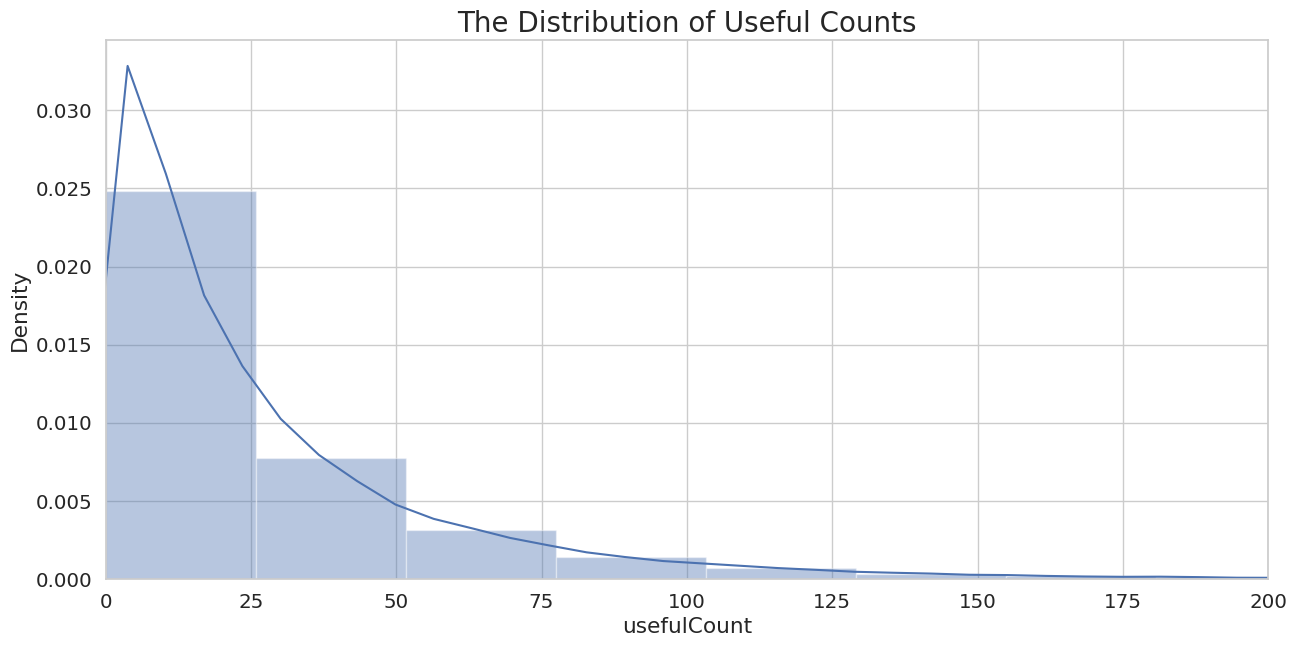

In [ ]:
sns.set(style='whitegrid', font_scale=1.3)
plt.rcParams['figure.figsize'] = [15, 7]
sns.distplot(data['usefulCount'].dropna())
plt.title('The Distribution of Useful Counts', fontsize=20)
plt.xlim(0, 200)  # Adjust limits as needed to magnify the x-axis scale
plt.show()

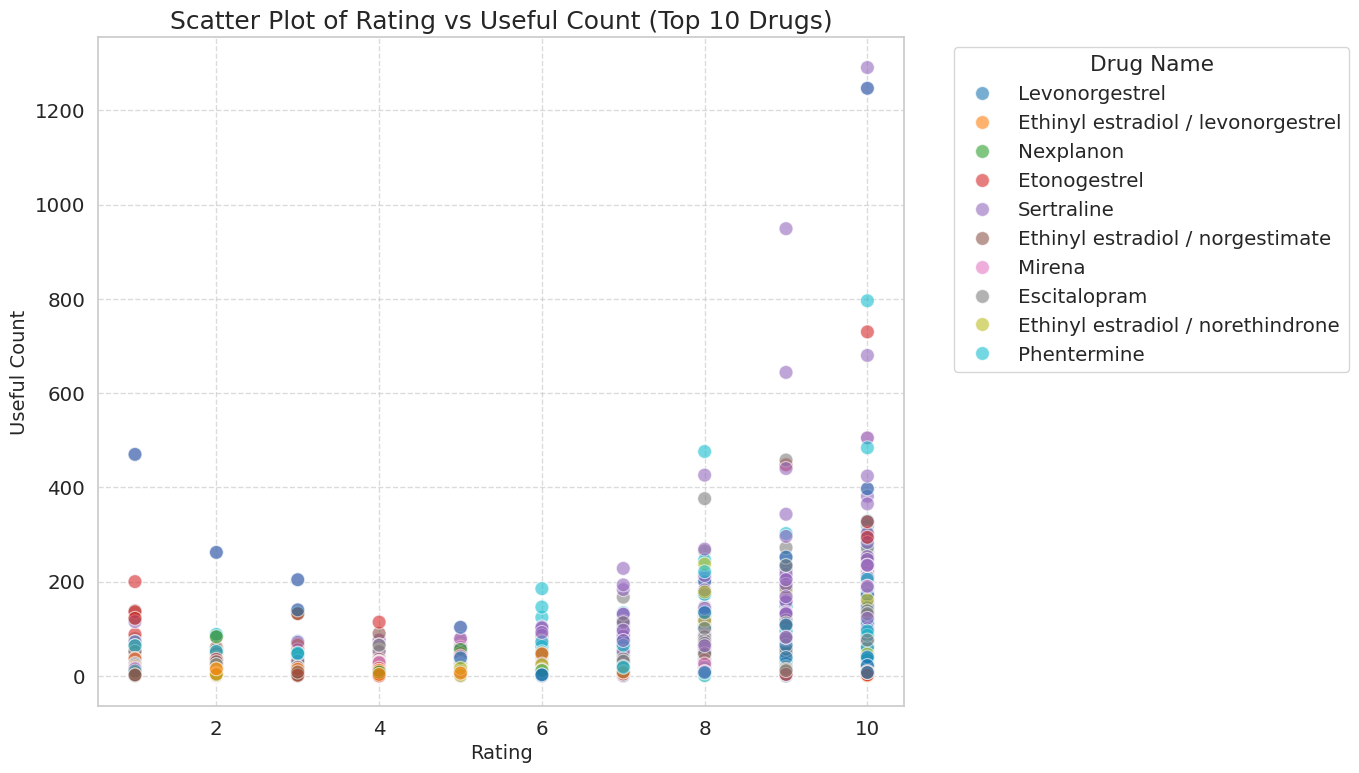

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limit to top 10 most common drugs for clearer visualization
top_drugs = data['drugName'].value_counts().nlargest(10).index
data_filtered = data[data['drugName'].isin(top_drugs)]

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='rating',
    y='usefulCount',
    hue='drugName',
    data=data_filtered,
    s=100,             # increase point size
    alpha=0.6,          # slightly more transparent
    edgecolor='w',      # white edge for separation
    palette='tab10'     # distinct colors
)

# Customize the plot
plt.title('Scatter Plot of Rating vs Useful Count (Top 10 Drugs)', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Useful Count', fontsize=14)
plt.legend(title='Drug Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Transforming date column

Feature Engineering/ Data Preprocessing

In [ ]:
# feature engineering
# let's make a new column named "Review_Sentiment" as Target

data.loc[(data['rating'] > 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] <= 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

,count
Review_Sentiment,
1.0,149963
0.0,63906


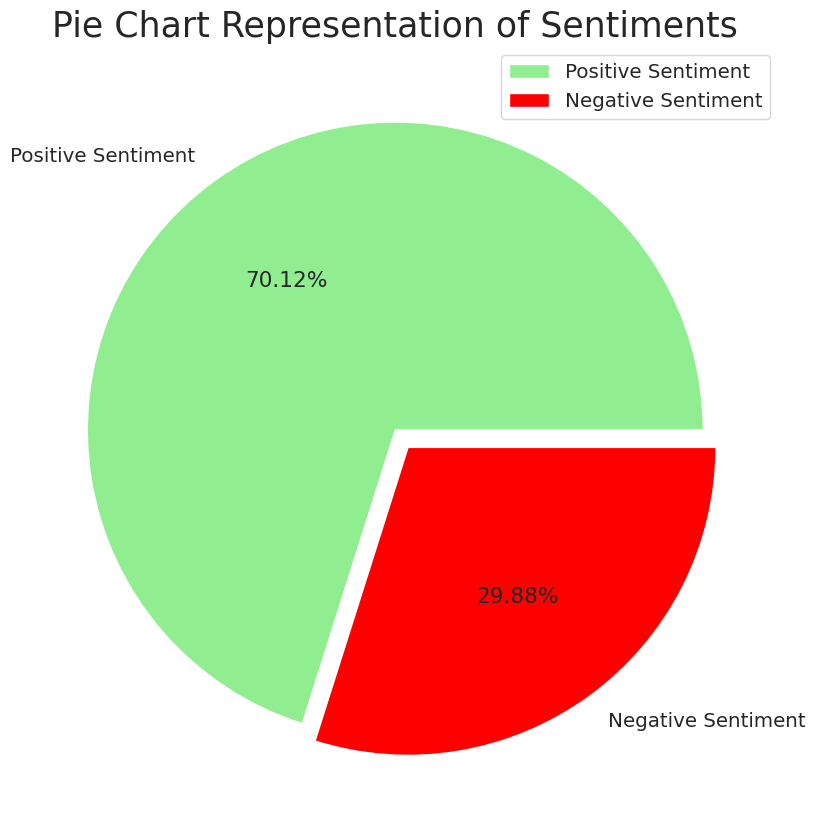

In [ ]:
size = [149963, 63906]
colors = ['lightgreen', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.07]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [ ]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment'],
      dtype='object')

In [ ]:
# changing to lower case
lower = data.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
data['review_clean'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
nltk.download('stopwords')
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1.0,"""it side effect, take combin bystol 5 mg fish ..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,1.0,"""mi son halfway fourth week intuniv. becam con..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.0,"""i use take anoth oral contraceptive, 21 pill ..."


In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

data['sentiment'] = sentiment(data['review'])
data['sentiment_clean'] = sentiment(data['review_clean'])

In [ ]:
# changing to lower case
lower = data.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
data['review_clean_ss'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [ ]:
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [ ]:
data = data.dropna(how="any", axis=0)

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
def extract_sentiment(text):
    sub = []
    for i in text:
        analysis = TextBlob(i)
        sub.append(analysis.sentiment.subjectivity)
    return sub

data['subjectivity'] = extract_sentiment(data['review'])
data['subjectivity_clean'] = extract_sentiment(data['review_clean'])
data['subjectivity_clean_ss'] = extract_sentiment(data['review_clean_ss'])

In [ ]:
nltk.download('punkt_tab')
def count_negations(text):
    negations = ['not', "n't", 'never', 'no']
    tokens = nltk.word_tokenize(text.lower())
    return sum(token in negations for token in tokens)

data['negation_count'] = data['review'].apply(count_negations)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Feature Selection

<Axes: >

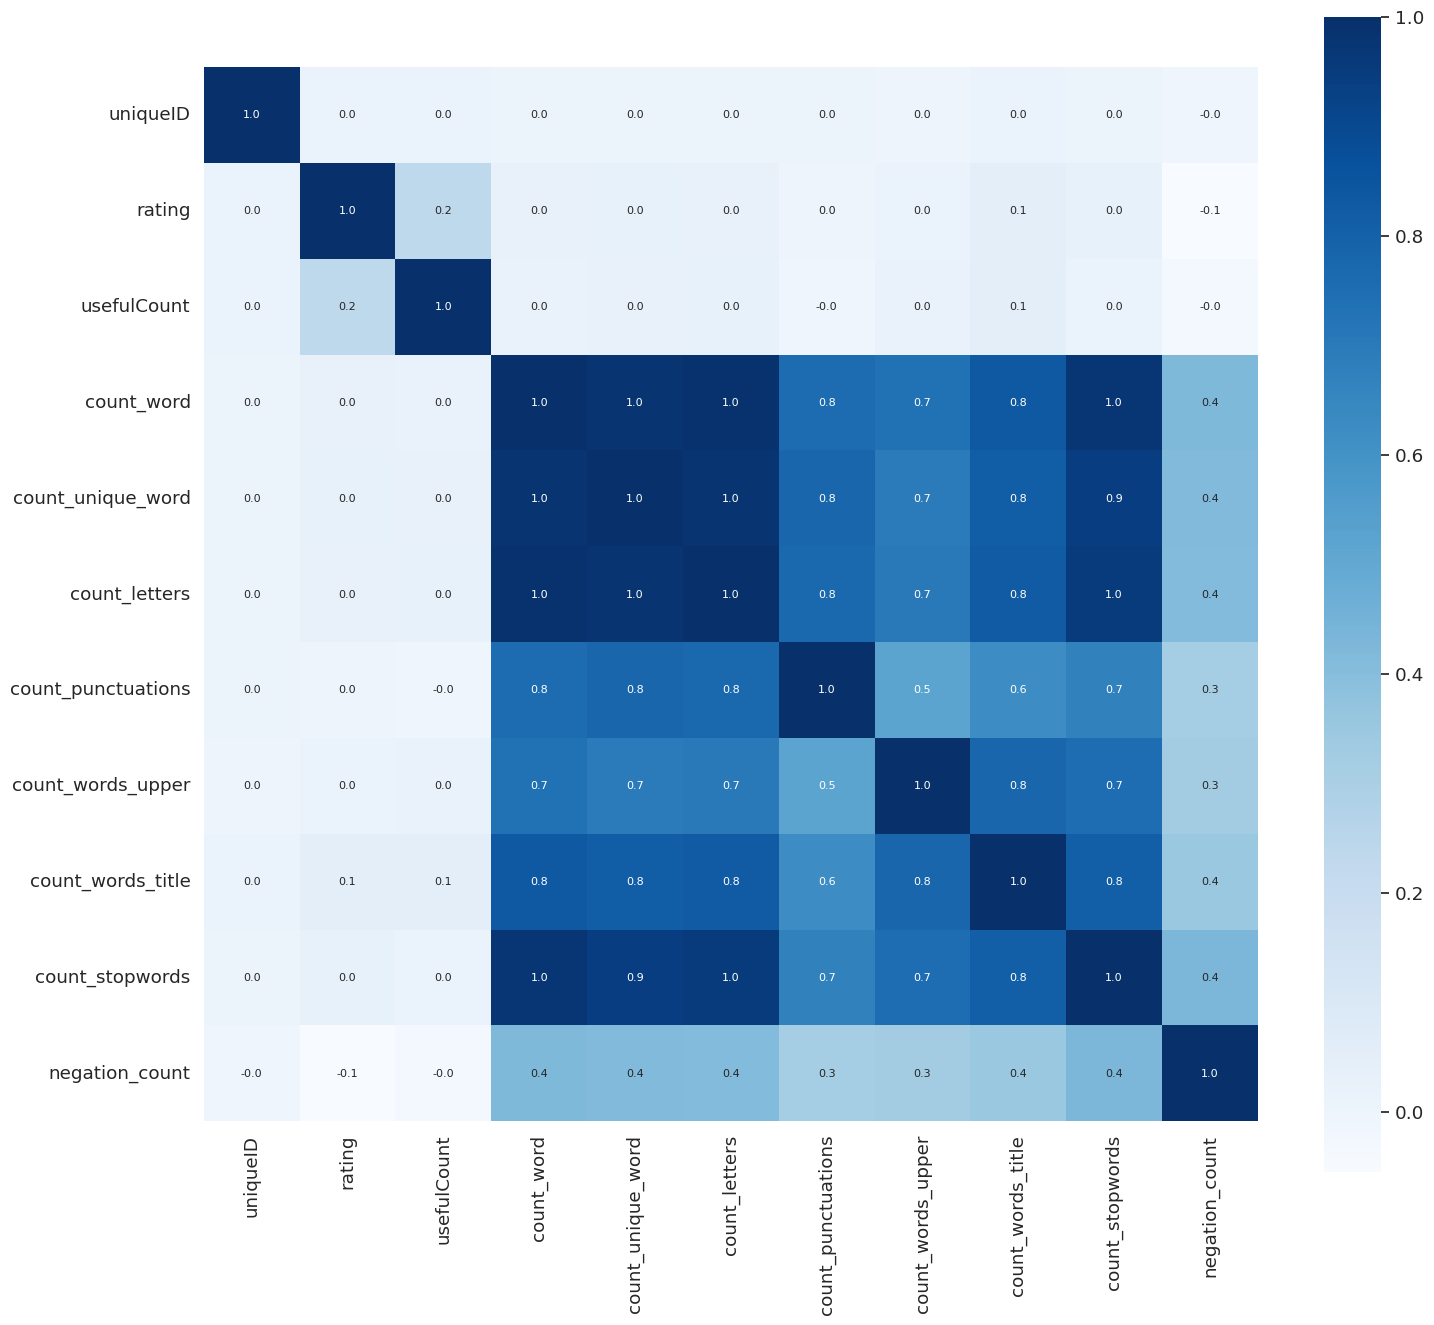

In [ ]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
correlation = data.select_dtypes(include = 'int64').corr()
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f',annot = True, annot_kws = {'size':8}, cmap='Blues')

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

After Label Encoding

<Axes: >

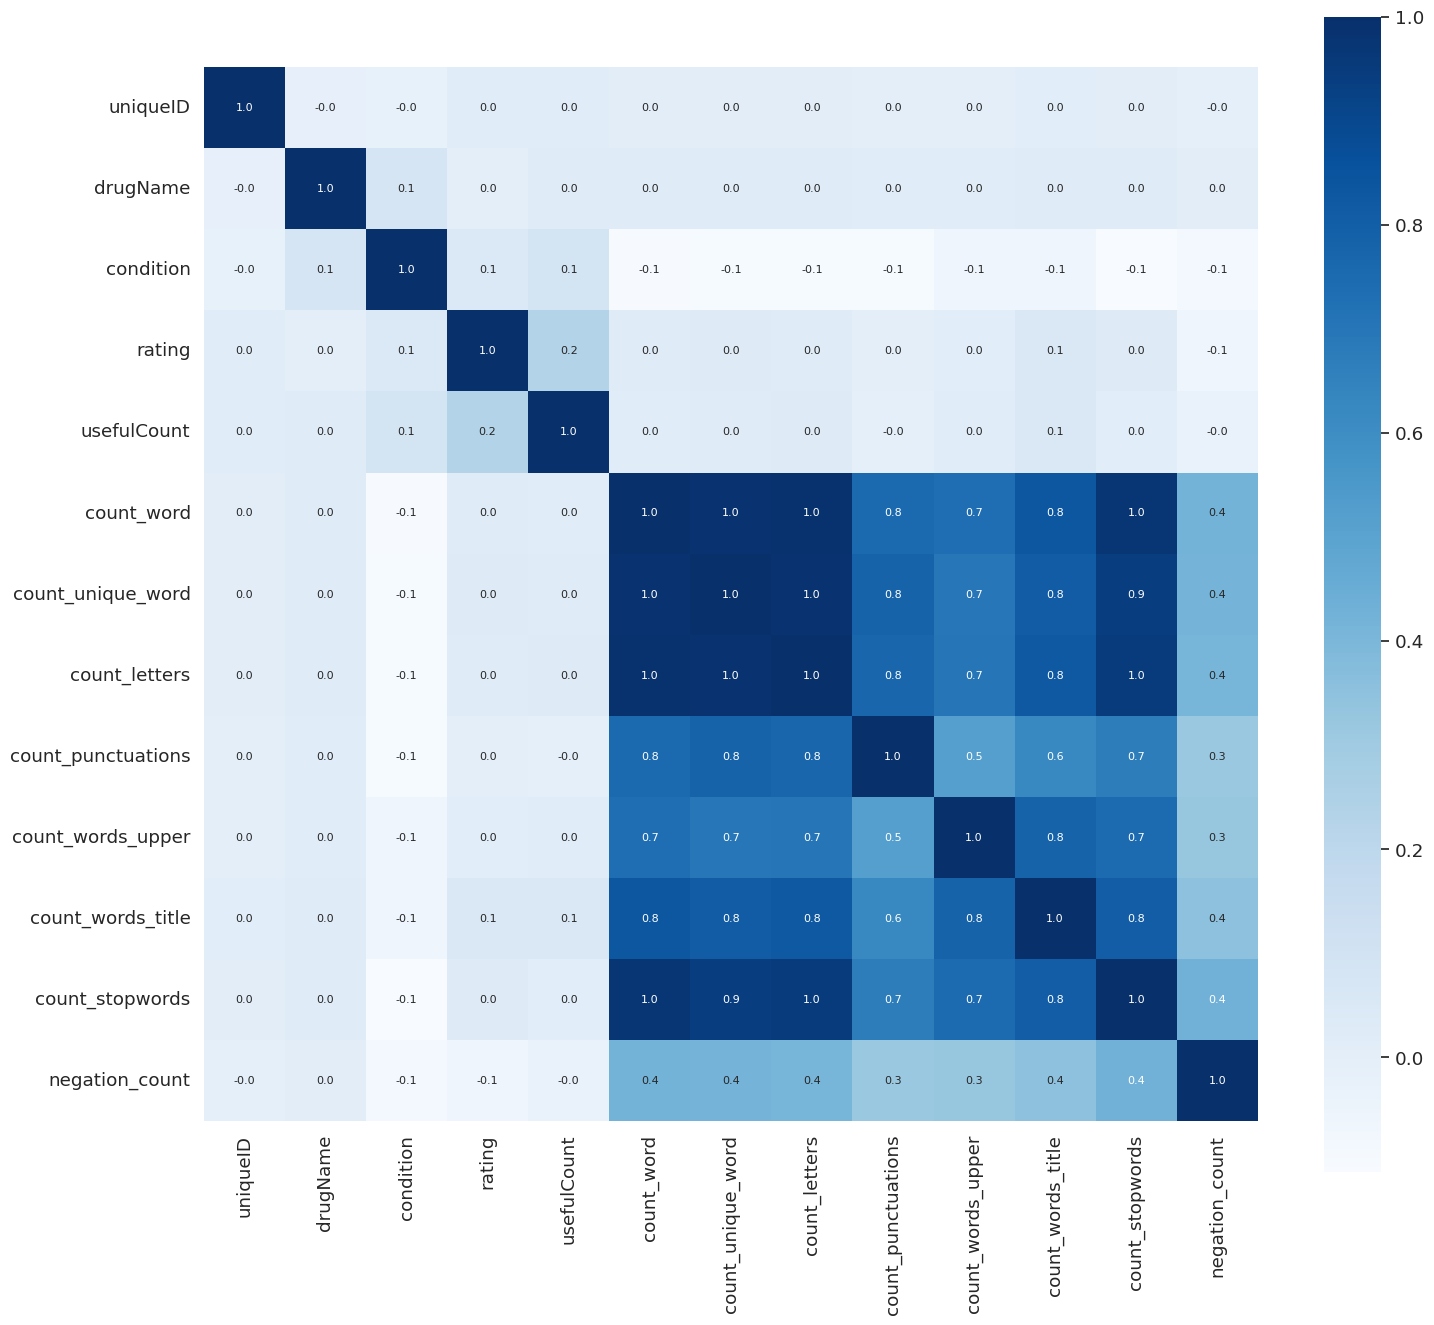

In [ ]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
correlation = data.select_dtypes(include = 'int64').corr()
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f',annot = True, annot_kws = {'size':8}, cmap='Blues')

In [ ]:
from sklearn.model_selection import train_test_split
features = data[['condition', 'usefulCount', 'sentiment',
                   'sentiment_clean_ss', 'subjectivity', 'subjectivity_clean_ss', 'negation_count', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (171095, 15)
The Test set size  (42774, 15)


Null Value Handling

In [ ]:
import numpy as np

# Check for NaN and infinity in the feature matrix X_train
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("X_train contains NaN or infinity values.")

# Check for NaN and infinity in the target vector y_train
if np.any(np.isnan(y_train)) or np.any(np.isinf(y_train)):
    print("y_train contains NaN or infinity values.")

In [ ]:
# Replace NaNs with the mean of the column (for features)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Alternatively, you can replace NaNs with a constant value or use other imputation strategies.

# Remove or handle infinite values
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Light GBM

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Initialize the LGBMClassifier
clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=0.10,
    num_leaves=30,
    subsample=0.9,
    max_depth=10,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    min_child_weight=2,
    silent=-1,
    verbose=-1,
)

# Fit the model
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Print the accuracy
print("The Accuracy of the model is : ", accuracy_score(y_test, predictions))

# Print the confusion matrix
print("The Confusion Matrix is ")
print(confusion_matrix(y_test, predictions))

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

The Accuracy of the model is :  0.9060878103520831
The Confusion Matrix is 
[[10142  2631]
 [ 1386 28615]]
Precision:  0.9050392141032141
Recall:  0.9060878103520831
F1 Score:  0.9046366353724222


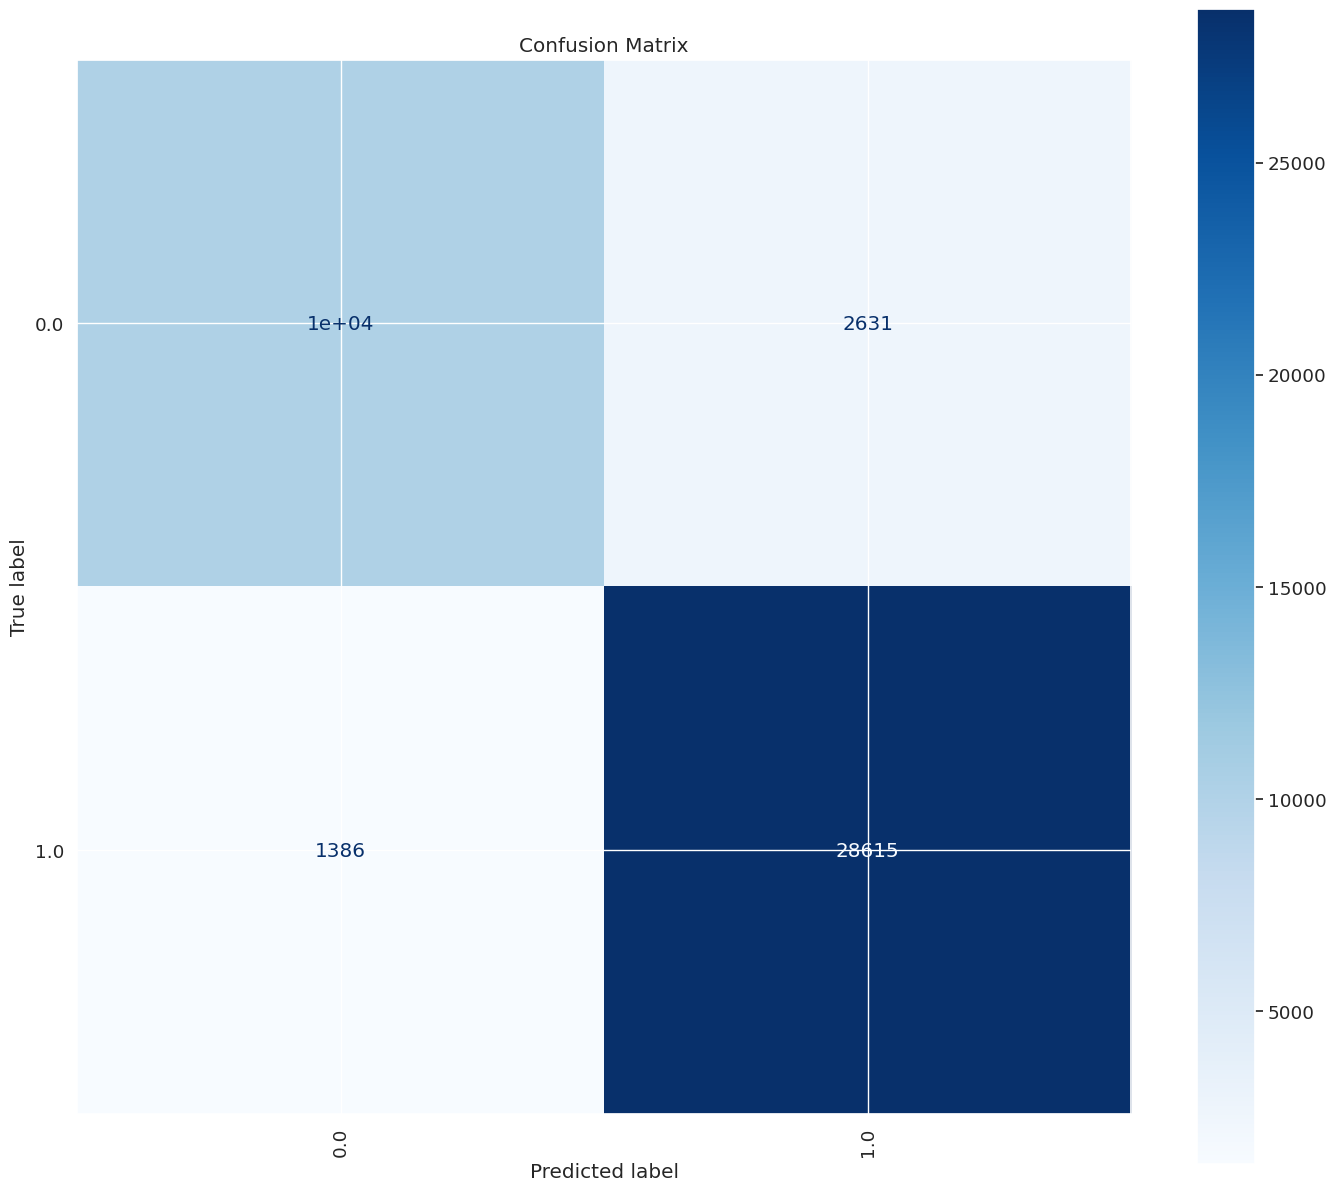

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

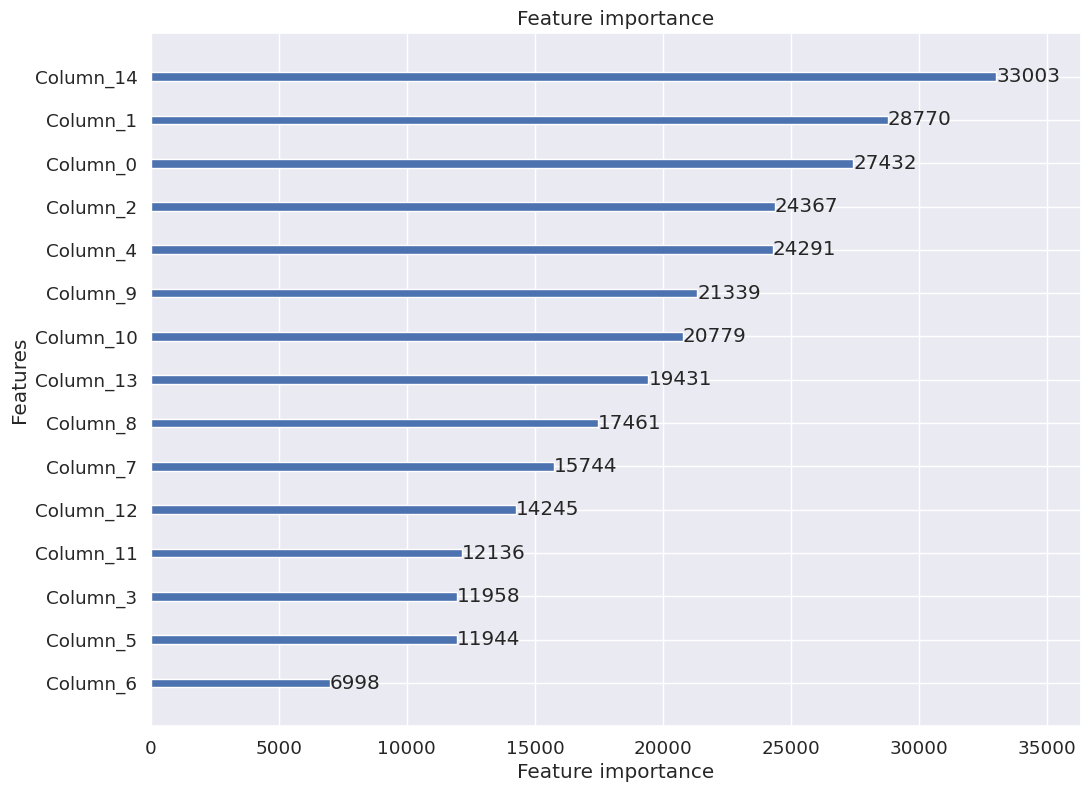

In [ ]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)

# Recursive Feature Elimination (RFE)
model_rf = RFE(rf, n_features_to_select=10)

# Fit the model
model_rf = model_rf.fit(X_train, y_train)

# Predictions
predictions_rf = model_rf.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, predictions_rf)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_rf)

# Precision, Recall, F1-score
precision = precision_score(y_test, predictions_rf, average='weighted')
recall = recall_score(y_test, predictions_rf, average='weighted')
f1 = f1_score(y_test, predictions_rf, average='weighted')

# Print the results

print("The Test Accuracy of the Random Forest model is : ", test_accuracy)
print("The Confusion Matrix is ")
print(conf_matrix)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

The Test Accuracy of the Random Forest model is :  0.9082152709589938
The Confusion Matrix is 
[[10101  2672]
 [ 1254 28747]]
Precision:  0.9073735062683829
Recall:  0.9082152709589938
F1 Score:  0.9065776959399751


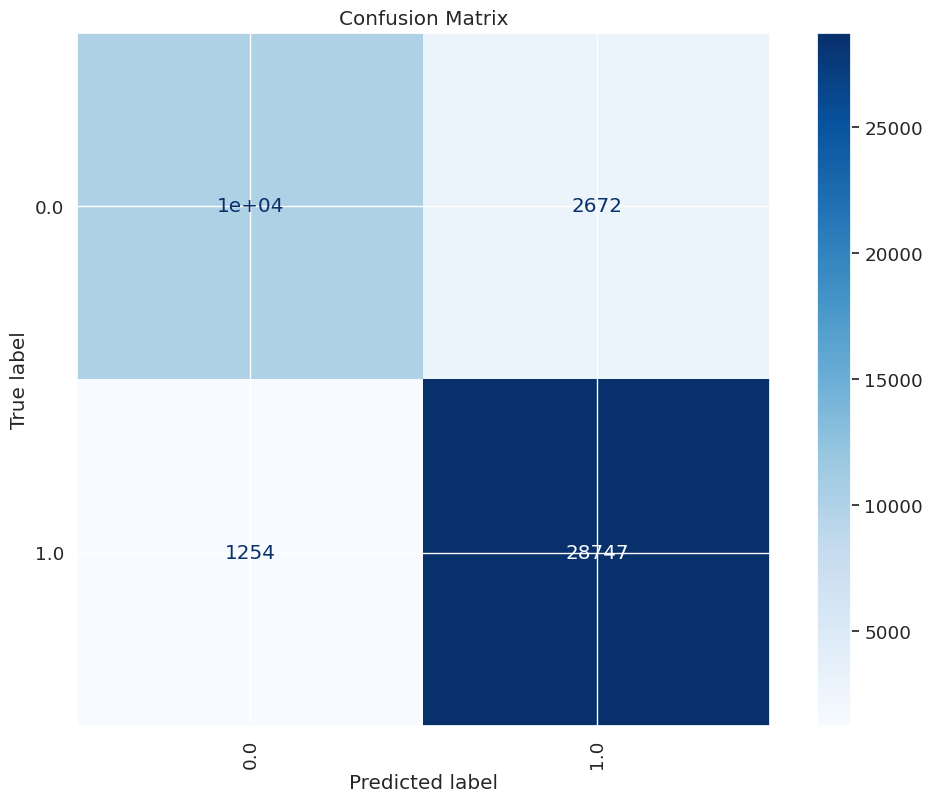

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test, cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()